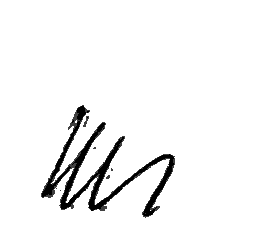

label: iii


In [32]:
import os
from PIL import Image
import argparse
import torch
import glob

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, images_list, labels_list, augmentations_func=None):
        super(MyDataset, self).__init__()
        self.images = images_list
        self.labels = labels_list
        self.augmentations = augmentations_func

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label
    
def build_images_list(dir_path):
    images_list = []
    labels_list = [] 
    directory = glob.glob(os.path.join(dir_path, '*'))
    for inner_dir in directory:
        inner_dir_files = glob.glob(os.path.join(inner_dir, '*'))
        for file_path in inner_dir_files:
            image = Image.open(file_path)
            images_list.append(image)
            labels_list.append(inner_dir.split("/")[-1])
            
    return images_list, labels_list
            
images_list_train, labels_list_train = build_images_list("/home/student/hw2_094295/data/train")
train_set = MyDataset(images_list_train, labels_list_train)
train_set[0][0].show()
print(f"label: {train_set[0][1]}")